<a href="https://colab.research.google.com/github/ykarray/Graph-theory/blob/main/Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.version.string
install.packages('lpSolve', repos='http://cran.rstudio.com')

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("lpSolveAPI")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Importation des bibliotheques

In [ ]:
library(lpSolve)
library(ggplot2)


**PLNR **

**Minimiser** 2x1 + 3x2

 SC:

*   x1 + x2 >= 10
*   2x1 + 5x2 >= 15
*   x1, x2 >= 0






 

 

 

In [ ]:




# Definir les coefficients de la fonction objective
obj <- c(2, 3)

# Definir la matrice de contraintes
mat <- matrix(c(1, 1, 2, 5), nrow=2, byrow=TRUE)

# Definir les vecteurs de direction et de valeurs a droite (right-hand side)
dir <- c(">=", ">=")
rhs <- c(10, 15)

# Resoudre le probleme
result <- lp("min", obj, mat, dir, rhs)
# Afficher les résultats de la résolution numérique
cat("Valeur optimale de z : ", result$objval, "\n")
cat("Valeur optimale de x : ", result$solution[1], "\n")
cat("Valeur optimale de y : ", result$solution[2], "\n")


Valeur optimale de z :  20 
Valeur optimale de x :  10 
Valeur optimale de y :  0 


**PLNE**
**Maximiser** 4x1 + 6x2

SC:


*   x1 + x2 <= 8
*   2x1 + 3x2 <= 14
*   x1, x2 entiers











In [ ]:


library(lpSolve)

# Définir les coefficients de la fonction objective
obj <- c(4, 6)

# Définir la matrice de contraintes
mat <- matrix(c(1, 1, 2, 3), nrow=2, byrow=TRUE)

# Définir les vecteurs de direction et de valeurs a droite (right-hand side)
dir <- c("<=", "<=")
rhs <- c(8, 14)

# Définir les indices des variables qui doivent prendre des valeurs entières
integers <- 1:2

# Résoudre le problème
result <- lp("max", obj, mat, dir, rhs, all.int=TRUE, int.vec=integers)
# Afficher les résultats de la résolution numérique
cat("Valeur optimale de z : ", result$objval, "\n")
cat("Valeur optimale de x : ", result$solution[1], "\n")
cat("Valeur optimale de y : ", result$solution[2], "\n")

Valeur optimale de z :  28 
Valeur optimale de x :  1 
Valeur optimale de y :  4 


**maximiser** z=16000x+10000y
 s.c:    

*   x+y≤400
*   2x+y≤600
*   x≥0,y≥0







Valeur optimale de z :  5200000 
Valeur optimale de x :  200 
Valeur optimale de y :  200 


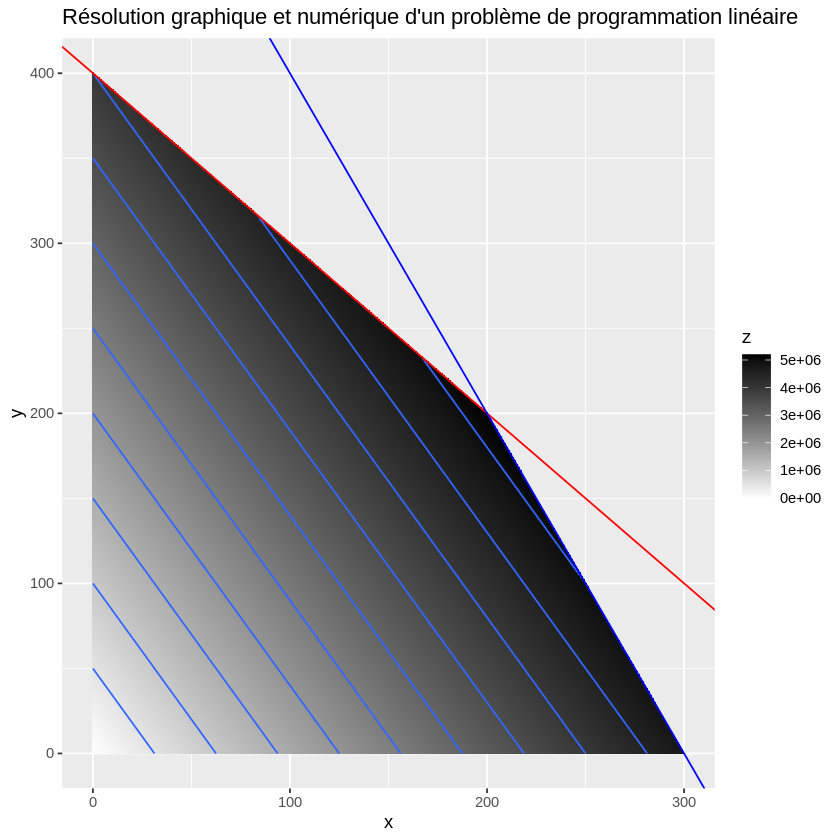

In [ ]:

# Charger les packages ggplot2 et lpSolve
library(ggplot2)
library(lpSolve)

# Définir la fonction objectif z(x,y)
z <- function(x, y) {
  16000 * x + 10000 * y
}

# Définir les contraintes c1(x) et c2(x)
c1 <- function(x) {
  400 - x
}

c2 <- function(x) {
  600 - 2 * x
}

# Résoudre le problème de programmation linéaire avec lpSolve
obj <- c(16000, 10000)
const <- matrix(c(1,1,2,1), ncol=2, byrow=TRUE)
rhs <- c(400,600)
max <- TRUE
result <- lp("max", obj, const, "<=", rhs, int = TRUE)

# Afficher les résultats de la résolution numérique
cat("Valeur optimale de z : ", result$objval, "\n")
cat("Valeur optimale de x : ", result$solution[1], "\n")
cat("Valeur optimale de y : ", result$solution[2], "\n")

# Générer une grille de points pour x et y
x <- seq(0, 400, 1)
y <- seq(0, 600, 1)
df <- expand.grid(x = x, y = y)

# Ajouter les contraintes c1(x) et c2(x) dans le dataframe
df$constraint1 <- (df$x + df$y <= 400)
df$constraint2 <- (2 * df$x + df$y <= 600)

# Ajouter la fonction objectif z(x,y) dans le dataframe
df$z <- z(df$x, df$y)

# Filtrer les points qui satisfont les contraintes
df <- df[df$constraint1 & df$constraint2 ,]

# Créer un graphique
p <- ggplot(df, aes(x = x, y = y)) +
  geom_tile(aes(fill = z)) +     # Ajouter des tuiles colorées en fonction de z
  geom_contour(aes(z = z)) +     # Ajouter des lignes de niveau pour z
  xlab("x") +                    # Ajouter une étiquette pour l'axe x
  ylab("y") +                    # Ajouter une étiquette pour l'axe y
  ggtitle("Résolution graphique et numérique d'un problème de programmation linéaire") # Ajouter un titre au graphique

# Ajouter les contraintes sur le graphique
p + geom_abline(intercept = 400, slope = -1, color = "red") +   # Ajouter une ligne pour c1(x)
  geom_abline(intercept = 600, slope = -2, color = "blue") +    # Ajouter une ligne pour c2(x)
  scale_fill_gradient(low = "white", high = "black")           # Modifier la palette de couleurs pour les tuiles
